# Homework 1
## Mean Variance Optimization
### 1. Summary Statistics

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [132]:
df = pd.ExcelFile(r'C:\Users\jnpad\OneDrive\Desktop\University of Chicago\FINM\03. Autumn Quarter 2022\Portfolio Theory and Risk Management I\Homework\Homework 1\multi_asset_etf_data.xlsx')

TR = pd.read_excel (df, 'total returns')
TR.set_index('Date', inplace = True)
TR = TR.drop(columns = ['SHV'])

print(TR)

mu = TR.mean(axis = 'index')*12
sigma = TR.std(axis = 'index')*np.sqrt(12)
sharpe_ratio = (TR.mean(axis = 'index')/TR.std(axis = 'index'))*np.sqrt(12)

                 BWX       DBC       EEM       EFA       HYG       IEF  \
Date                                                                     
2009-04-30  0.008993 -0.001000  0.155582  0.115190  0.138460 -0.027452   
2009-05-31  0.053672  0.162663  0.159400  0.131918  0.028555 -0.020773   
2009-06-30  0.005149 -0.026259 -0.022495 -0.014050  0.033516 -0.005572   
2009-07-31  0.031284  0.018568  0.110146  0.100415  0.069191  0.008317   
2009-08-31  0.007628 -0.040365 -0.013136  0.045031 -0.016969  0.007635   
...              ...       ...       ...       ...       ...       ...   
2022-04-30 -0.069696  0.056408 -0.061351 -0.067391 -0.041803 -0.042283   
2022-05-31  0.005460  0.046131  0.006135  0.019959  0.016299  0.006184   
2022-06-30 -0.046443 -0.075000 -0.051577 -0.087666 -0.070499 -0.008634   
2022-07-31  0.020443 -0.019895 -0.003491  0.051688  0.066989  0.029615   
2022-08-31 -0.051172  0.006128 -0.016767 -0.054778 -0.037825 -0.034538   

                 IYR       PSP       

### (a)

In [133]:
def summary_stats(df, annual_fac):
    ss_df = (df.mean() * annual_fac).to_frame('Mean')
    ss_df['Vol'] = df.std() * np.sqrt(annual_fac)
    ss_df['Sharpe'] = ss_df['Mean'] / ss_df['Vol']
    
    return round(ss_df, 6)

summary = summary_stats(TR, 12)
summary

,Mean,Vol,Sharpe
BWX,0.004653,0.078535,0.059248
DBC,0.038846,0.180186,0.215590
EEM,0.072621,0.191787,0.378655
EFA,0.081124,0.161885,0.501125
HYG,0.071588,0.089403,0.800730
IEF,0.025833,0.060077,0.429996
IYR,0.150128,0.184407,0.814113
PSP,0.133272,0.221299,0.602227
QAI,0.022862,0.048879,0.467723
SPY,0.150293,0.144811,1.037857


### (b)

The "best" Sharpe Ratio would be given by the greatest Sharpe Ratio. This means that an asset's mean return for a given level of volatility, or risk, is greater than some other asset's. SPY has the best/highest Sharpe Ratio. BWX has the lowest, or "worst", Sharpe Ratio.

In [134]:
summary.nlargest(1, 'Sharpe')

,Mean,Vol,Sharpe
SPY,0.150293,0.144811,1.037857


In [135]:
summary.nsmallest(1, 'Sharpe')

,Mean,Vol,Sharpe
BWX,0.004653,0.078535,0.059248


## 2. Descriptive Analysis

### (a)

The correlation matrix can be visualized through the heatmap below:

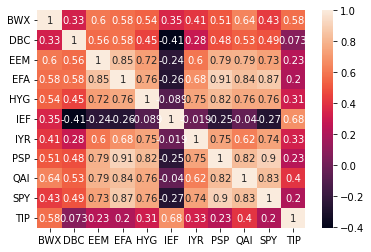

In [49]:
corr_matrix = TR.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [74]:
corr_matrix[corr_matrix == 1] = None

corr_rank = corr_matrix.unstack().sort_values().dropna()
pair_max = corr_rank.index[-1]
pair_min = corr_rank.index[0]

print(f'The pair with the maximum correlation is {pair_max}')
print(f'The pair with the minimum correlation is {pair_min}')

The pair with the maximum correlation is ('EFA', 'PSP')
The pair with the minimum correlation is ('IEF', 'DBC')


### (b)

Domestic bonds can be found within the ETFs, IEF, which tracks 7-10 year U.S. Treasury bonds and HYG, which tracks high-yield corporate bonds in the U.S. Foreign bonds are represented by BWX which tracks the fixed-rate local currency sovereign debt of investment grade countries outside the U.S. 

In [108]:
summary.loc[['TIP', 'IEF', 'HYG', 'BWX']]

,Mean,Vol,Sharpe
TIP,0.034967,0.047833,0.731032
IEF,0.025833,0.060077,0.429996
HYG,0.071588,0.089403,0.800730
BWX,0.004653,0.078535,0.059248


We see that TIP have had higher mean return and lower volatility in comparison to IEF and BWX. As a result, the TIP Sharpe Ratio is greater than both IEF and BWX.
TIP however does not outperform HYG in mean return, although its volatility is lower than HYG's volatility. HYG's Sharpe Ratio is greater than TIP's Sharpe Ratio.

### (c)

Yes, TIP does seem to expand the investment opportunity set as they outperform other bonds in mean return and volatility and are generally lowly correlated with other assets (less IEF and BWX). Harvard should consider them as a separate asset

## 3. The MV Frontier

### (a)

In [136]:
def tangency_vector(df, diagonalize_Sigma = False):
    Sigma = df.cov()

    # Let N be the number of assets
    N = Sigma.shape[0]

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))

    mu = df.mean()
    Sigma_inv = np.linalg.inv(Sigma_adj)
    weights = (Sigma_inv @ mu) / (np.ones(N) @ Sigma_inv @ mu)

    omega_tangency = pd.Series(weights, index=mu.index)

    return omega_tangency, mu, Sigma_adj


omega_tangency, mu, Sigma = tangency_vector(TR)

omega_tangency.to_frame('Tangency Weights')

,Tangency Weights
BWX,-1.335168
DBC,0.239151
EEM,0.339786
EFA,-0.117068
HYG,1.070489
IEF,2.457952
IYR,-0.307783
PSP,-0.513078
QAI,-3.955222
SPY,2.430623


### (b)

In [137]:
def portfolio_stats(omega, mu, Sigma, annualize_fac):
    # Mean
    mean = (mu @ omega)*annualize_fac
    
    # Volatility
    vol = np.sqrt(omega @ Sigma @ omega) * np.sqrt(annualize_fac)
    
    # Sharpe Ratio
    sharpe_ratio = mean/vol
    
    return round(pd.DataFrame(data = [mean, vol, sharpe_ratio], 
                              index = ['Mean', 'Volatility', 'Sharpe'], 
                              columns = ['Portfolio Stats']), 4)

portfolio_stats(omega_tangency, mu, Sigma, 12)


,Portfolio Stats
Mean,0.3428
Volatility,0.1759
Sharpe,1.9493


### 4. The Allocation

### (a)

In [139]:
def target_MV_portfolio(df, target_return, diagonalize_Sigma=False):
    omega_tangency, mu, Sigma = tangency_vector(df, diagonalize_Sigma = diagonalize_Sigma)
    Sigma_adj = Sigma.copy()
    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))

    Sigma_inv = np.linalg.inv(Sigma_adj)

    N = Sigma_adj.shape[0]
    
    delta_tilde = ((np.ones(N) @ Sigma_inv @ mu) / (mu @ Sigma_inv @ mu))*target_return
    omega_star = delta_tilde * omega_tangency
    return omega_star, mu, Sigma_adj

omega_star, mu, Sigma = target_MV_portfolio(TR, 0.015)

omega_star_TR = omega_star.to_frame('MV Portfolio Weights')

omega_star_TR

,MV Portfolio Weights
BWX,-0.701036
DBC,0.125567
EEM,0.178406
EFA,-0.061467
HYG,0.562065
IEF,1.290558
IYR,-0.161603
PSP,-0.269394
QAI,-2.076706
SPY,1.276209


### (b)

In [ ]:
portfolio_stats(omega_star, mu, Sigma, 12)

,Portfolio Stats
Mean,0.1800
Volatility,0.0923
Sharpe,1.9493


### (c)

In [96]:
omega_star_TR.sort_values(omega_star_TR.columns[0], ascending = False)

,MV Portfolio Weights
IEF,1.290558
SPY,1.276209
HYG,0.562065
TIP,0.362454
EEM,0.178406
DBC,0.125567
EFA,-0.061467
IYR,-0.161603
PSP,-0.269394
BWX,-0.701036


The portfolio is most long in IEF and most short in QAI. The portfolio also has a considerable long position in SPY, although less than that of IEF.

In [97]:
summary.sort_values('Sharpe', ascending = False)

,Mean,Vol,Sharpe
SPY,0.150293,0.144811,1.037857
IYR,0.150128,0.184407,0.814113
HYG,0.071588,0.089403,0.800730
TIP,0.034967,0.047833,0.731032
PSP,0.133272,0.221299,0.602227
EFA,0.081124,0.161885,0.501125
QAI,0.022862,0.048879,0.467723
IEF,0.025833,0.060077,0.429996
EEM,0.072621,0.191787,0.378655
DBC,0.038846,0.180186,0.215590


No, the long/short position do not line up with the assets with the strongest Sharpe Ratios. SPY and IYR have the strongest Sharpe Ratios, while IEF and QAI have very similar Sharpe Rations, closer to zero.

## 5. Simple Portfolios

### (a)

In [140]:
equal_weights_vector = np.ones(len(omega_tangency))

target_mean = 0.015
equal_weights_vector[equal_weights_vector == 1] = 1/(len(omega_tangency))

equal_weights_vector = equal_weights_vector * (target_mean / (TR.mean() @ equal_weights_vector))
portfolio_stats(equal_weights_vector, mu, Sigma, 12)

,Portfolio Stats
Mean,0.1800
Volatility,0.2517
Sharpe,0.7152


### (b)

In [142]:
w = 1/(TR.std())
target_mean = 0.015

multiplier = 1 / ((w @ TR.mean()) / target_mean)

w = multiplier * w

w.to_frame('Weights')

,Weights
BWX,0.379571
DBC,0.165439
EEM,0.155431
EFA,0.184142
HYG,0.333430
IEF,0.496193
IYR,0.161652
PSP,0.134704
QAI,0.609866
SPY,0.205852


In [143]:
portfolio_stats(w, mu, Sigma, 12)

,Portfolio Stats
Mean,0.1800
Volatility,0.2356
Sharpe,0.7640


### (c)

In both cases, the Sharpe Ratios for these portfolios is lower than that of the MV portfolio in 2.4.

## 6.

In [144]:
TR_no_TIP = TR.drop(columns = ['TIP'])

omega_star_no_TIP, mu_no_TIP, Sigma_no_TIP = target_MV_portfolio(TR_no_TIP, 0.015)

omega_star_no_TIP.to_frame('MV Portfolio Weights')

,MV Portfolio Weights
BWX,-0.693614
DBC,0.150896
EEM,0.191055
EFA,-0.091857
HYG,0.555275
IEF,1.535086
IYR,-0.153716
PSP,-0.255394
QAI,-2.052413
SPY,1.301270


In [147]:
portfolio_stats(omega_star_no_TIP, mu_no_TIP, Sigma_no_TIP, 12)

,Portfolio Stats
Mean,0.1800
Volatility,0.0928
Sharpe,1.9390


The Sharpe Ratio decreases by 0.5284% when TIP is removed from the portfolio.

## 7. Out of Sample Performance

### (a)

In [149]:
TR_2021 = TR.loc[:'2021']

omega_p, mu_p, Sigma_p = target_MV_portfolio(TR_2021, 0.015, diagonalize_Sigma=False)

omega_p.to_frame('MV Weights')

,MV Weights
BWX,-0.258101
DBC,-0.012409
EEM,0.009344
EFA,-0.060502
HYG,0.659440
IEF,1.189181
IYR,-0.257300
PSP,-0.083399
QAI,-1.647846
SPY,1.117640


### (b)

In [150]:
omega_2021, mu_2021, Sigma_2021 = tangency_vector(TR_2021)

portfolio_stats(omega_p, mu_2021, Sigma_2021, 12)

,Portfolio Stats
Mean,0.1800
Volatility,0.0780
Sharpe,2.3085


### (c)

In [151]:
TR_2022 = TR.loc[:'2022']

omega_2022, mu_2022, Sigma_2022 = tangency_vector(TR_2022)

portfolio_stats(omega_p, mu_2022, Sigma_2022, 12)

,Portfolio Stats
Mean,0.1627
Volatility,0.0924
Sharpe,1.7613
